# Data Ananlysis Process

1. Asking wrangling
2. Data Wrangling
    a. gathering

    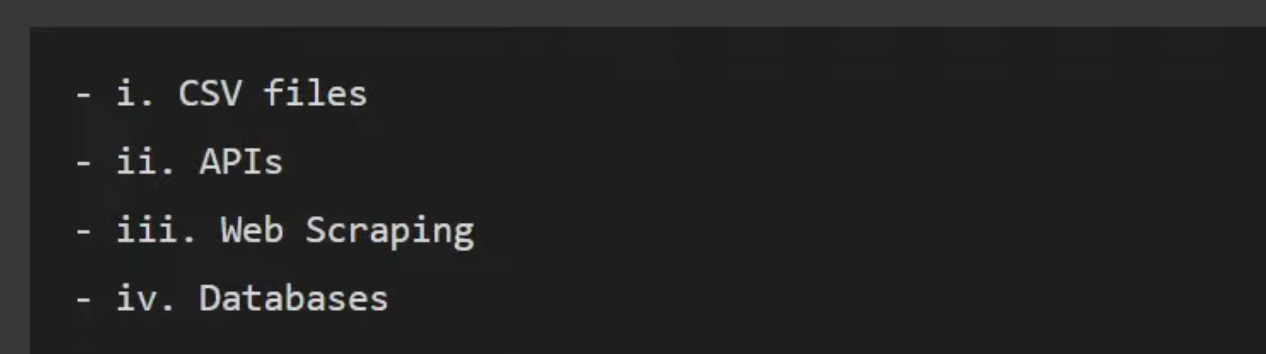

    b. accessing data

    c. Cleaning Data

3. Exploratry Data Analysis
4. Drawing Conclusion
5. Cimunicating Results...


# Summary of today's session

1. you have to become sherlock
2. Will try to create a frame work
3. frameworks may vary
4. the goal is to give you idea..

# 1. Data Wrangling

1. Data grathering
2. data accessing
3. data cleaning..

# 1b. Data Accessing

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is

# Type of uncleaned Data

 there are 2 kind of uncleaned data

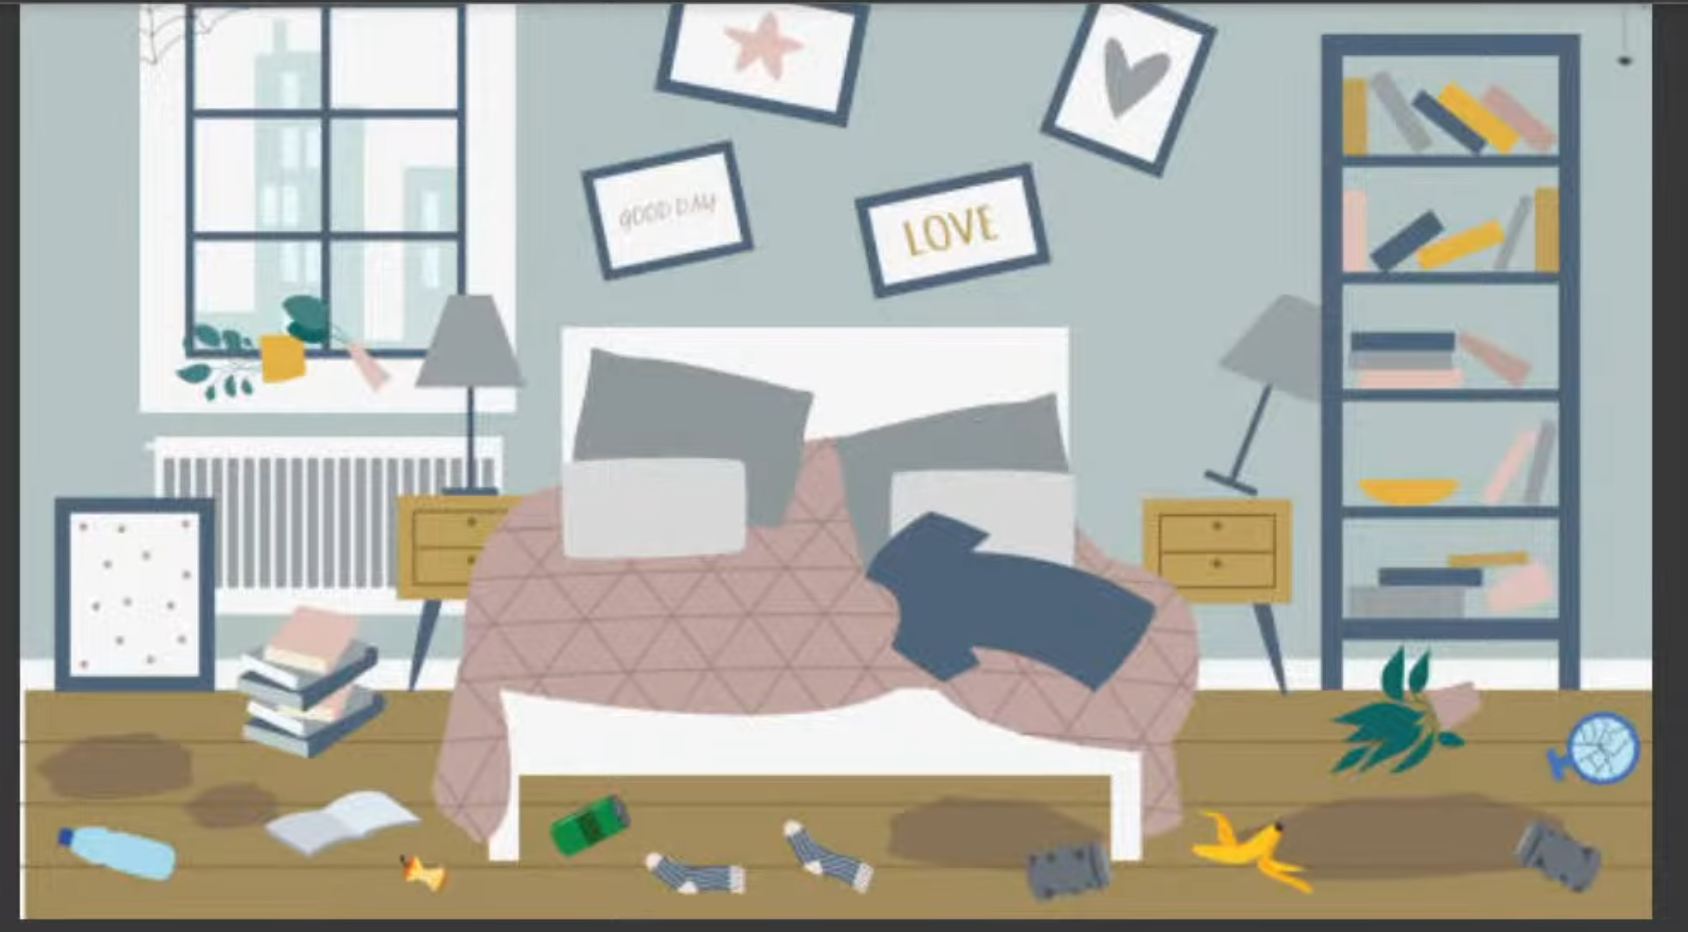


• Dirty Data (Data with Quality issues) : Dirty data, also known as low quality data. Low quality data has content issues.

• Duplicated data

• Missing Data

• Corrupt Data

• Inaccurate Data

• Messy Data (Data with tidiness issues) : Messy data, also known as untidy data. Untidy data has structural issues. Tidy data has the following properties:

• Each variable forms a column

• Each observation forms a row

• Each observational unit forms a table

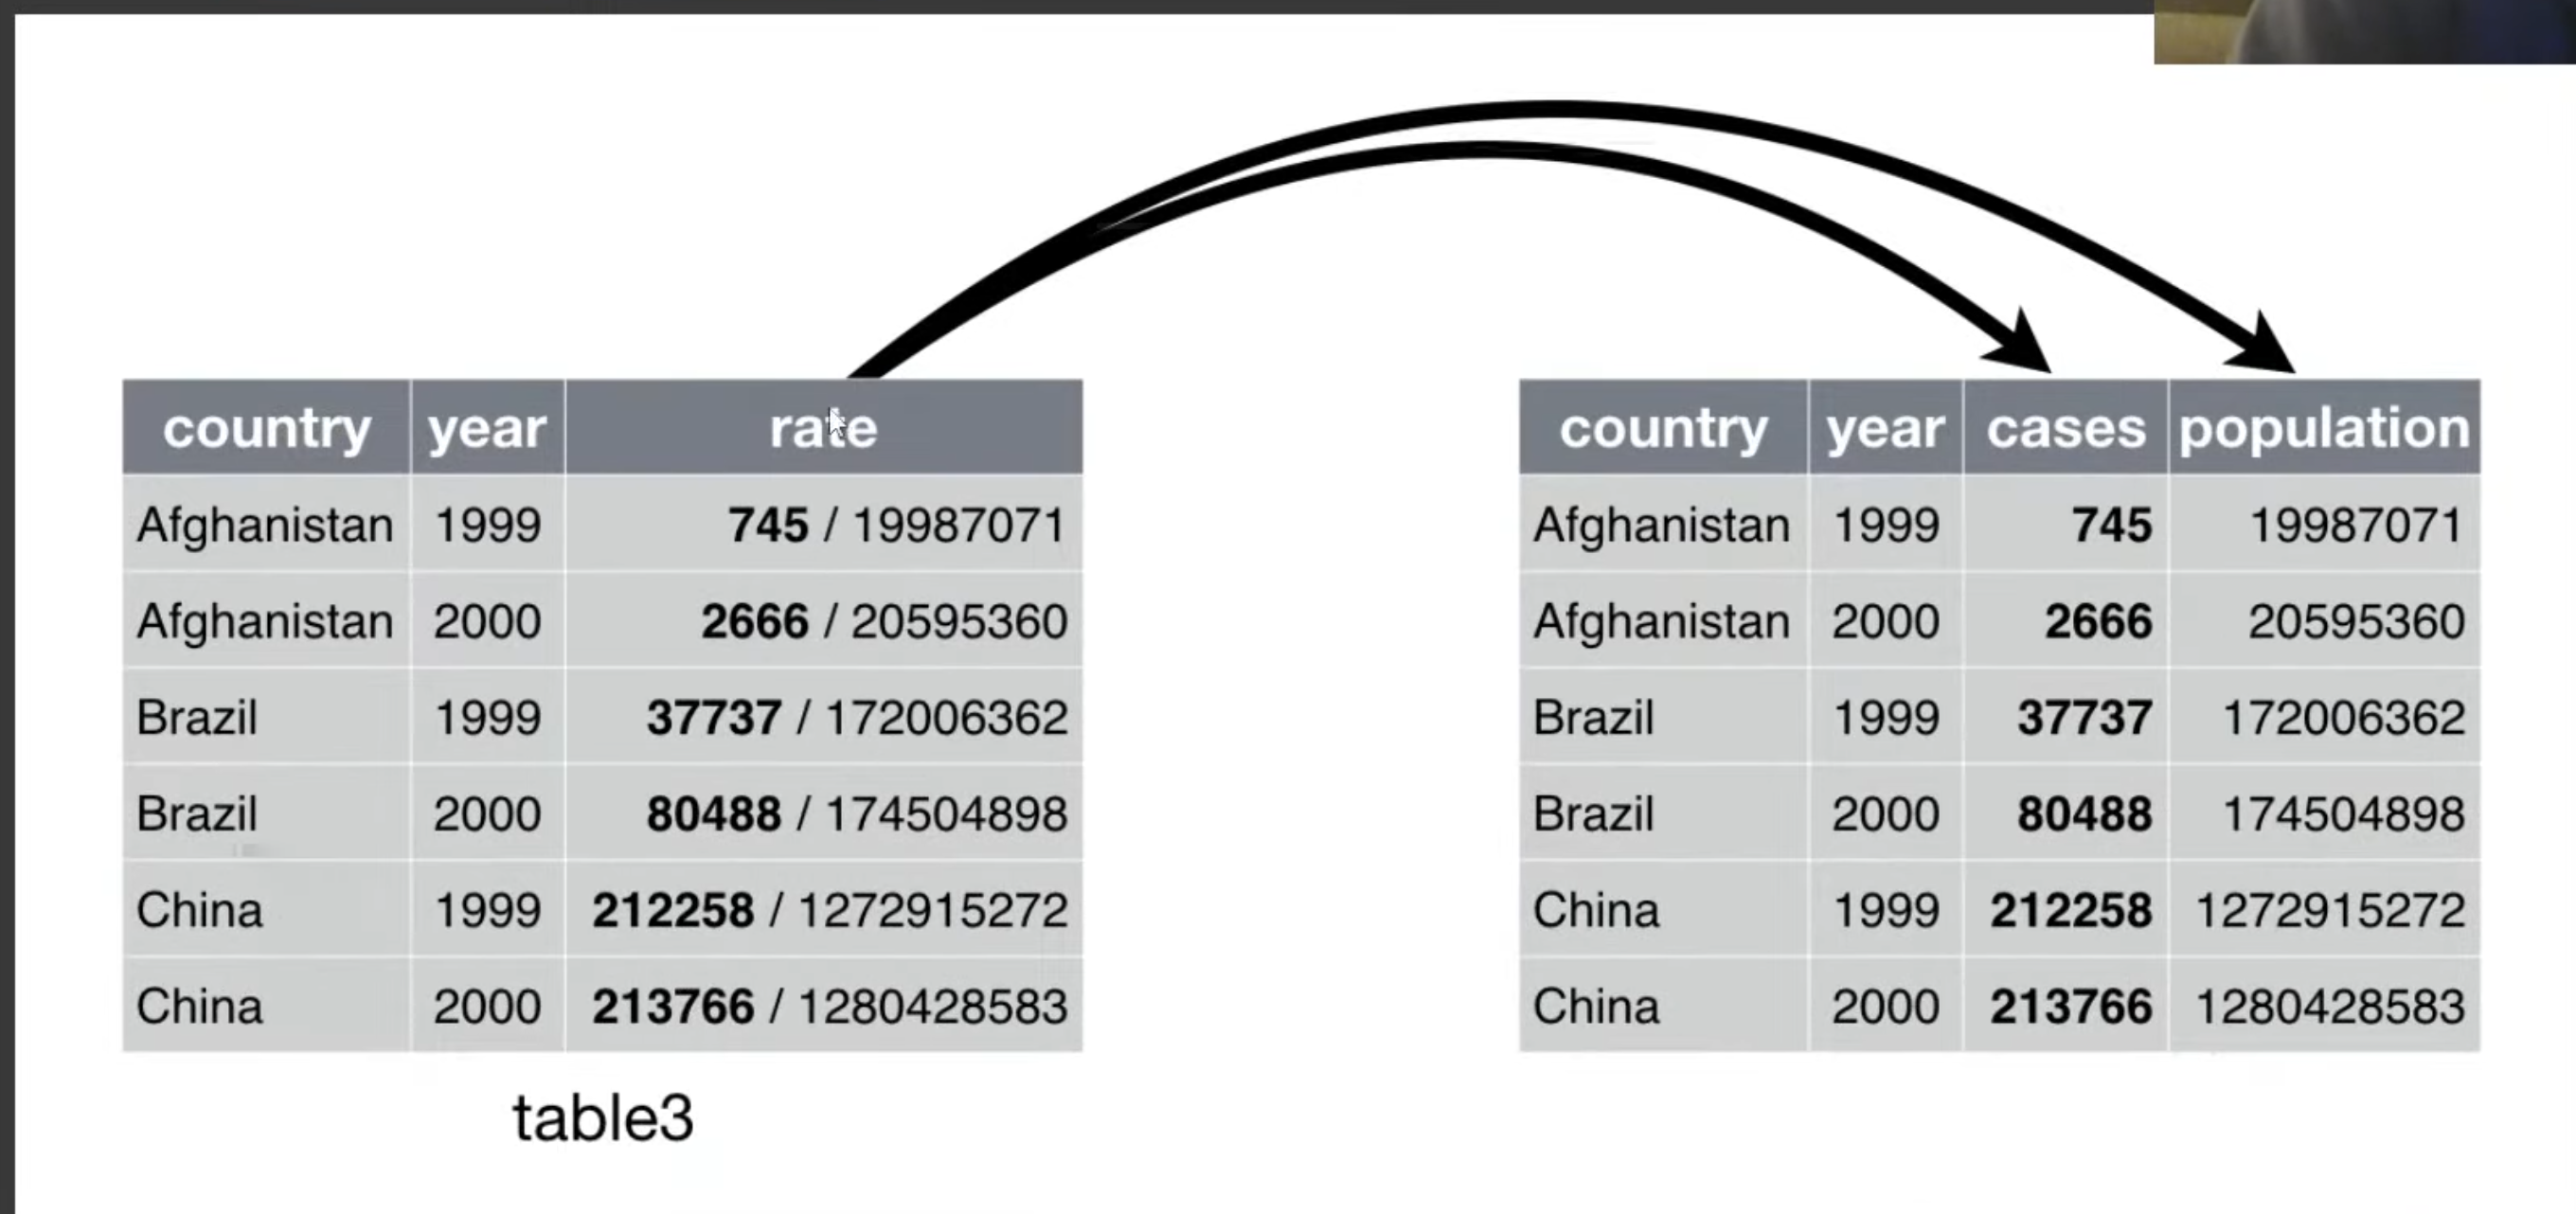

In [1]:
import numpy as np
import pandas as pd

In [10]:
patients = pd.read_csv("/Users/nitishkumar/Documents/GitHub/DataScience/Data Analysis/Datasets/patients.csv")
treatments = pd.read_csv("/Users/nitishkumar/Documents/GitHub/DataScience/Data Analysis/Datasets/treatments_cut.csv")
adverse_reactions = pd.read_csv("/Users/nitishkumar/Documents/GitHub/DataScience/Data Analysis/Datasets/adverse_reactions.csv")
treatment_cut = pd.read_csv("/Users/nitishkumar/Documents/GitHub/DataScience/Data Analysis/Datasets/treatments.csv")

In [11]:
# view datasets
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [12]:
treatments_cut.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [13]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [14]:
adverse_reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


# 1. Write a summary for your data

This is a dataset about 500 patients of which 350 patients participated in a clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After 4 weeks, which isn't enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:

• 175 patients switched to Auralin for 24 weeks

• 175 patients continued using Novodra for 24 weeks

Data about patients feeling some adverse effects is also recorded.

# 2. Write Column descriptions

Table -> patients:

• patient_id: the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin

• assigned_sex: the assigned sex of each patient at birth (male or female)

• given_name: the given name (i.e. first name) of each patient

• surname: the surname (i.e. last name) of each patient

• address: the main address for each patient

• city: the corresponding city for the main address of each patient

• state: the corresponding state for the main address of each patient

• zip_code: the corresponding zip code for the main address of each patient

• country: the corresponding country for the main address of each patient (all United states for this clinical trial)

• contact: phone number and email information for each patient

• birthdate: the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)

• weight: the weight of each patient in pounds (Ibs)

• height: the height of each patient in inches (in)

• bmi: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI of 25.0  or more is overweight , while the healthy range is 18.5 to 24.9 The inclusion criteria for his clinical trail is 16 >= BMI >= 38

# Table ->treatments and treatment_cut:

• given_name: the given name of each patient in the Master Patient Index that took part in the clinical trial

• surname: the surname of each patient in the Master Patient Index that took part in the clinical trial

• auralin: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) and the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u), which is the international unit of measurement and the standard measurement for insulin.

• novodra: same as above, except for patients that continued treatment with Novodra

• hbaic_start: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin Alc. The HbA1c test measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.

• hbalc_end: the patient's HbA1c level at the end of the last week of treatment

• hbalc_change: the change in the patient's HbA1c level from the start of treatment to the end, i.e., hba1c_start - hba1c_end. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus

# Table -> adverse_reactions

• given_name: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)

• surname: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)

• adverse_reaction: the adverse reaction reported by the patient

# 3. Add any additional information
Additional useful information:

• Insulin resistance varies person to person, which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.

• It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This diversity is reflected in the patients table.

# Types of Assessment

There are 2 types of assessment styles

• Manual
- Looking through the data manually in google sheets

• Programmatic - By using pandas functions such as info, describe or sample

# Steps in Assessment

There are 2 steps involved in Assessment

• Discover

• Document

In [15]:
# export the data for manual assesment

with pd. ExcelWriter('clinical_trials.xlsx') as writer: 
    patients.to_excel(writer, sheet_name='patients')
    treatments.to_excel(writer,sheet_name='treatments')
    treatment_cut.to_excel(writer, sheet_name="treatment_cut")
    adverse_reactions.to_excel(writer,sheet_name='adverse_reactions')

# issuess with the datasets..
1. Dirty data 
    table = 'patients'

 - patient_id = 9 misspelled name "Dsvid" instead of David 'accuracy'

 - state col somethings contain full anme and some time abbrivietation 'consistency' 
 - zeap code col has entries with four digits..  'validity' 
 - duplicates name of john Doe
 - one patient has weight 48.800000
 - one patient height has 27 inches..
 - 

 Table - 'Treatments & treatment_cut'

- given_name and surname col is all in lower case
- remove u from auralin
- - in navodra and Auralin col treatment as nan 
- missing value in hb1ac_change col
- in hba1c_change has wrong numbers..
table - 'Adverse_reactions'
 - given name and surname is all in lowercase 
 -  

2. Messy data

table = 'patients' 
 - contacts col with number and email
 
 Table - 'Treatments & treatment_cut'

 - Auralin col Navadra shoulb be split into 2 columns start and end 

table - 'Adverse_reactions'

- this table should not exist independently

# Automatic Assessment..

In [17]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [18]:
treatment_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [19]:
treatment_cut.sample

<bound method NDFrame.sample of     given_name       surname    auralin    novodra  hba1c_start  hba1c_end  \
0     veronika      jindrová  41u - 48u          -         7.63       7.20   
1       elliot    richardson          -  40u - 45u         7.56       7.09   
2     yukitaka      takenaka          -  39u - 36u         7.68       7.25   
3         skye    gormanston  33u - 36u          -         7.97       7.62   
4       alissa        montez          -  33u - 29u         7.78       7.46   
..         ...           ...        ...        ...          ...        ...   
275     albina      zetticci  45u - 51u          -         7.93       7.73   
276       john   teichelmann          -  49u - 49u         7.90       7.58   
277     mathea       lillebø  23u - 36u          -         9.04       8.67   
278     vallie        prince  31u - 38u          -         7.64       7.28   
279     samúel  guðbrandsson  53u - 56u          -         8.00       7.64   

     hba1c_change  
0          

In [20]:
patients.duplicated().sum()

0

In [21]:
patients['patient_id'].duplicated().sum()

0

In [24]:
patients[patients.duplicated(subset=['given_name', 'surname'])]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
277,278,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [27]:
treatments[treatments.duplicated(subset=['given_name', 'surname'])]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [29]:
adverse_reactions.duplicated().sum()

0

In [30]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [32]:
patients[patients['weight']==48.800000]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [33]:
patients[patients['height']==27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [34]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,70.000000,70.000000,42.000000
mean,7.838000,7.443143,0.518810
std,0.423007,0.418706,0.270719
min,7.510000,7.020000,0.280000
25%,7.640000,7.232500,0.340000
50%,7.730000,7.345000,0.370000
75%,7.860000,7.467500,0.907500
max,9.910000,9.460000,0.970000


In [35]:
treatments.sort_values('hba1c_start')

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
23,miłosław,wiśniewski,-,34u - 33u,7.51,7.08,0.93
19,noe,aranda,26u - 34u,-,7.51,7.17,0.34
58,christopher,woodward,-,55u - 51u,7.51,7.06,0.95
47,regolo,nucci,51u - 59u,-,7.53,7.02,NaN
6,sara,miles,30u - 35u,-,7.53,7.12,NaN
...,...,...,...,...,...,...,...
11,gabriela,michalčíková,26u - 36u,-,8.37,7.97,NaN
37,sofia,hermansen,-,34u - 34u,8.90,8.57,0.33
64,lixue,hsueh,-,22u - 23u,9.21,8.80,0.91
42,daimy,tromp,-,40u - 45u,9.41,8.94,0.97


In [36]:
treatments.sort_values('hba1c_end')

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
47,regolo,nucci,51u - 59u,-,7.53,7.02,NaN
58,christopher,woodward,-,55u - 51u,7.51,7.06,0.95
23,miłosław,wiśniewski,-,34u - 33u,7.51,7.08,0.93
24,lóa,hrafnsdóttir,22u - 31u,-,7.60,7.09,NaN
6,sara,miles,30u - 35u,-,7.53,7.12,NaN
...,...,...,...,...,...,...,...
11,gabriela,michalčíková,26u - 36u,-,8.37,7.97,NaN
37,sofia,hermansen,-,34u - 34u,8.90,8.57,0.33
64,lixue,hsueh,-,22u - 23u,9.21,8.80,0.91
42,daimy,tromp,-,40u - 45u,9.41,8.94,0.97


In [39]:
treatments.sort_values('hba1c_change', na_position='first')

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
6,sara,miles,30u - 35u,-,7.53,7.12,NaN
7,frydryk,adamski,63u - 74u,-,7.75,7.27,NaN
8,jane,citizen,-,37u - 38u,7.98,7.60,NaN
...,...,...,...,...,...,...,...
58,christopher,woodward,-,55u - 51u,7.51,7.06,0.95
41,dalmacia,madrid,-,26u - 23u,7.67,7.21,0.96
42,daimy,tromp,-,40u - 45u,9.41,8.94,0.97
34,adlan,shishani,-,43u - 40u,7.84,7.37,0.97


Note - Assessing Data is an Iterative Process


# Data Quality Dimensions

• Completeness > is data missing?

• Validity -> is data invalid - negative height -> duplicate patient id

• Accuracy - data is valid but not accurate > weight > 1kg

• Consistency > both valid and accurate but written differently > New Youk and NY *

# Order of severity
Completeness <- Validity <- Accuracy <- Consisitency


# Data Cleaning Order
1. Quality -> Completeness
2. Tidiness
3. Quality -> Validity
4. Quality -> Accuracy
5. Quality - Consistency

# Steps involved in Data cleaning

• Define

• Code

• Test

always make sure to create copy of your pandas dataframe befroe you start the cleaning process... 

In [51]:
treatments_df = treatments.copy()
treatments_cut_df = treatment_cut.copy()
patients_df = patients.copy()
adverse_reactions_df = adverse_reactions.copy()

In [52]:
patients_df[patients_df['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [53]:
patients_df.fillna('No data available')

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [54]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [56]:
treatments_df['hba1c_change'] = treatments_df['hba1c_start'] - treatments_df['hba1c_end'] 
treatments_cut_df['hba1c_change'] = treatments_cut_df['hba1c_start'] - treatments_df['hba1c_end'] 


In [57]:
# 
treatments_cut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  70 non-null     float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [58]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [59]:
# in patient table regex to seperate phone numebr and email

In [72]:
# Load the data (assuming the file is already read into df)
file_path = "/Users/nitishkumar/Documents/GitHub/DataScience/Data Analysis/Datasets/patients_df.csv"


In [81]:
import pandas as pd
import re

def process_contact_info(file_path):
    df = pd.read_csv(file_path)
    
    def extract_info(text):
        if pd.isna(text):
            return None, None
        
        text = str(text)
        phone_match = re.findall(r'\+?\d{1,3}[\s.-]?\(?\d{1,4}\)?[\s.-]?\d{1,4}[\s.-]?\d{1,9}', text)
        phone = phone_match[0] if phone_match else None
        
        remaining_text = re.sub(r'\+?\d{1,3}[\s.-]?\(?\d{1,4}\)?[\s.-]?\d{1,4}[\s.-]?\d{1,9}', '', text).strip()
        other_info = remaining_text if remaining_text else None
        
        return phone, other_info
    
    df[['phone_number', 'other_info']] = df['contact'].apply(lambda x: pd.Series(extract_info(x)))
    print(df[['contact', 'phone_number', 'other_info']].head())
    return df

# File path

file_path = "/Users/nitishkumar/Documents/GitHub/DataScience/Data Analysis/Datasets/patients.csv"
df = process_contact_info(file_path)


                                      contact       phone_number  \
0        951-719-9170ZoeWellish@superrito.com       951-719-9170   
1       PamelaSHill@cuvox.de+1 (217) 569-3204  +1 (217) 569-3204   
2            402-363-6804JaeMDebord@gustr.com       402-363-6804   
3  PhanBaLiem@jourrapide.com+1 (732) 636-8246  +1 (732) 636-8246   
4             334-515-7487TimNeudorf@cuvox.de       334-515-7487   

                  other_info  
0   ZoeWellish@superrito.com  
1       PamelaSHill@cuvox.de  
2       JaeMDebord@gustr.com  
3  PhanBaLiem@jourrapide.com  
4        TimNeudorf@cuvox.de  


In [83]:
patients_df

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [90]:
treatments_df = pd.concat([treatments_df, treatments_cut_df])

In [91]:
treatments_df

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,0.40
2,alwin,svensson,36u - 39u,-,7.78,7.34,0.44
3,thể,lương,-,61u - 64u,7.64,7.22,0.42
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,NaN
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,NaN
278,vallie,prince,31u - 38u,-,7.64,7.28,NaN


In [99]:
treatments_df=treatments_df.melt(id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'], var_name = 'type', value_name = 'dosage_range')

In [100]:
treatments_df

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_range
0,jožka,resanovič,7.56,7.22,0.34,auralin,22u - 30u
1,inunnguaq,heilmann,7.85,7.45,0.40,auralin,57u - 67u
2,alwin,svensson,7.78,7.34,0.44,auralin,36u - 39u
3,thể,lương,7.64,7.22,0.42,auralin,-
4,amanda,ribeiro,7.85,7.47,0.38,auralin,36u - 44u
...,...,...,...,...,...,...,...
1255,albina,zetticci,7.93,7.73,NaN,novodra,-
1256,john,teichelmann,7.90,7.58,NaN,novodra,49u - 49u
1257,mathea,lillebø,9.04,8.67,NaN,novodra,-
1258,vallie,prince,7.64,7.28,NaN,novodra,-


In [102]:
treatments_df=treatments_df[treatments_df['dosage_range'] != '-']

In [112]:
treatments_df['dosage_start'] = treatments_df['dosage_range'].str.split('-').str.get(0)
treatments_df['dosage_end'] = treatments_df['dosage_range'].str.split('-').str.get(1)

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_50326/2601478946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_start'] = treatments_df['dosage_range'].str.split('-').str.get(0)
/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_50326/2601478946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_end'] = treatments_df['dosage_range'].str.split('-').str.get(1)


In [114]:
treatments_df.drop(columns='dosage_range', inplace=True)

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_50326/3803290707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df.drop(columns='dosage_range', inplace=True)


In [117]:
treatments_df['dosage_start']=treatments_df['dosage_start'].str.replace('u', '')
treatments_df['dosage_end']=treatments_df['dosage_end'].str.replace('u', '')

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_50326/4024694862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_start']=treatments_df['dosage_start'].str.replace('u', '')
/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_50326/4024694862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_end']=treatments_df['dosage_end'].str.replace('u', '')


In [119]:
treatments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 0 to 1256
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    630 non-null    object 
 1   surname       630 non-null    object 
 2   hba1c_start   630 non-null    float64
 3   hba1c_end     630 non-null    float64
 4   hba1c_change  210 non-null    float64
 5   type          630 non-null    object 
 6   dosage_start  630 non-null    object 
 7   dosage_end    630 non-null    object 
dtypes: float64(3), object(5)
memory usage: 44.3+ KB


In [122]:
treatments_df['dosage_start']=treatments_df['dosage_start'].astype('int')
treatments_df['dosage_end']=treatments_df['dosage_end'].astype('int')


/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_50326/3743477119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_start']=treatments_df['dosage_start'].astype('int')
/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_50326/3743477119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_df['dosage_end']=treatments_df['dosage_end'].astype('int')


In [123]:
treatments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 0 to 1256
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    630 non-null    object 
 1   surname       630 non-null    object 
 2   hba1c_start   630 non-null    float64
 3   hba1c_end     630 non-null    float64
 4   hba1c_change  210 non-null    float64
 5   type          630 non-null    object 
 6   dosage_start  630 non-null    int64  
 7   dosage_end    630 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 44.3+ KB


In [124]:
treatments_df.merge(adverse_reactions_df, how='left', on=['given_name', 'surname'])

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end,adverse_reaction
0,jožka,resanovič,7.56,7.22,0.34,auralin,22,30,NaN
1,inunnguaq,heilmann,7.85,7.45,0.40,auralin,57,67,NaN
2,alwin,svensson,7.78,7.34,0.44,auralin,36,39,NaN
3,amanda,ribeiro,7.85,7.47,0.38,auralin,36,44,NaN
4,sara,miles,7.53,7.12,0.41,auralin,30,35,NaN
...,...,...,...,...,...,...,...,...,...
625,yasmin,araujo,7.82,7.36,NaN,novodra,51,54,NaN
626,hiromu,horikawa,7.77,7.28,NaN,novodra,47,46,NaN
627,leo,vieira,7.74,7.36,NaN,novodra,30,33,NaN
628,steven,roy,7.87,7.43,NaN,novodra,41,43,headache


In [125]:
adverse_reactions_df

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort
